# Assignment (Problem set #3)

In [3]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Q1. Linear Regression

우리는 학생들이 공부한 `시간과 점수의 상관관계`에 대해 분석해보고 싶다. 주석을 참고하여 다음 문제를 해결하시오.

In [4]:
# 1.필요한 패키지와 데이터를 가져온다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2.load 'student_scores.csv' dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_scores.csv')
print(dataset.head())

# 3.데이터를 x, y로 나누세요.
X_data = dataset['Hours']
y_data = dataset['Scores']

# 4. X_data와 y_data의 shape을 확인하라.
print(X_data.shape)
print(y_data.shape)

# 5. split data into train set & test set
# 조건 : train data의 비율이 80%가 될 수 있도록 지정하시오.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 6. training set와 test set를 2차원 배열로 reshape 하시오.
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25,)
(25,)


In [14]:
# 7. define model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 8. fit the model
lr.fit(X_train, y_train)
print(lr.predict([[5.0]]))
print(lr.coef_, lr.intercept_)

[51.23728313]
[9.68207815] 2.826892353899737


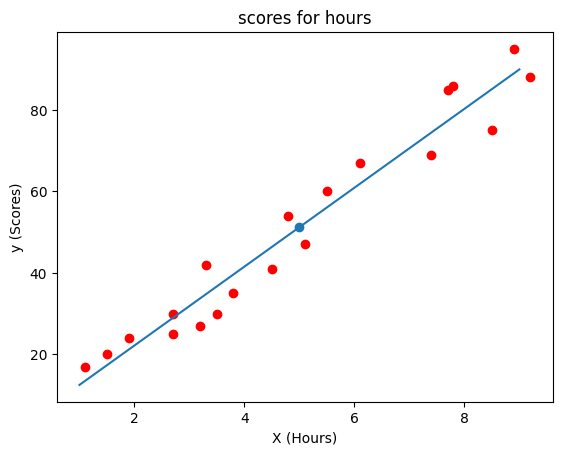

In [22]:
# 9. 시각화 (matplotlib 완전 정복)
# wk3 압축 파일에 있는 'wk3_ss_q1_graph.png'를 참고하여 그래프를 그리시오.
# Hint : plt 사용, function의 계수 사용, 구간 [1,9]
plt.scatter(X_train, y_train, color='red')
plt.plot([1,9], [1*lr.coef_+lr.intercept_, 9*lr.coef_+lr.intercept_])

plt.scatter(5.0, 51.23728313)
plt.xlabel('X (Hours)')
plt.ylabel('y (Scores)')
plt.title('scores for hours')
plt.show()

In [24]:
# model의 score 함수를 이용해 test 데이터에 대한 점수를 구하라.
print(lr.score(X_test, y_test))

0.9678055545167994


## Q2. Polynomial Regression

우리는 다항 회귀에 대해 이해하고자 Housin_Prices_data을 관찰하기로 했다.
다항 회귀를 사용하여 아래 문제를 해결하라.

In [26]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing_Prices_data.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


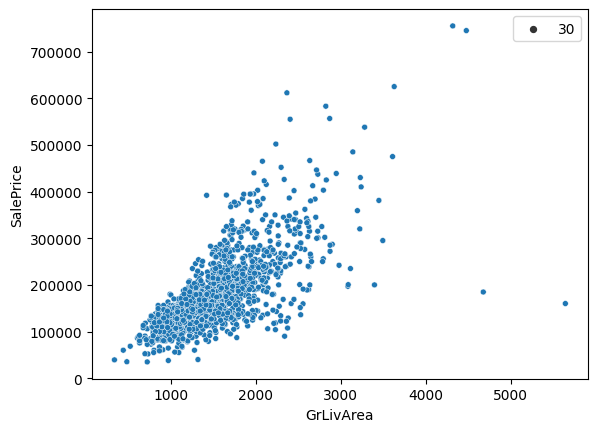

In [34]:
# 위 데이터가 어떻게 분포 되어 있는지 확인해보자
# wk1의 seaborn 내용을 참고하자
# x는 GrLivArea, y는 SalePrice, size는 30로 설정하여 구성하라
sns.scatterplot(x='GrLivArea', y='SalePrice', data = data, size=30)
plt.show()


In [65]:
# 전처리
# 필요한 열 선택
# 불러온 데이터에서 GrLivArea와 SalePrice만 선택하여 data에 저장하라
data = data[['GrLivArea', 'SalePrice']]

# 데이터 타입 변환 (문자열 -> 숫자)
data = data.apply(pd.to_numeric, errors='coerce')

# 결측치 처리
data = data.dropna()

# data를 x, y에 선언하자.
# 이때 feature들로는 bmi, charges만 이용한다고 하자.
X = data['GrLivArea'].values
Y = data['SalePrice'].values

# 1차원인 X를 numpy 배열의 2차원으로 reshape 해주자.
X = np.array(X).reshape(-1, 1)

In [66]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures를 이용하여 degree가 2인 feature들로 변환하자.
model = PolynomialFeatures(degree=2, include_bias=False)
x_poly = model.fit_transform(X)

In [69]:
from sklearn.linear_model import LinearRegression
#define model
lr = LinearRegression()
lr.fit(x_poly, Y)

# 에측값 생성
X_test = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
# 변환
graph_ploy = model.transform(X_test)
result = lr.predict(graph_ploy)

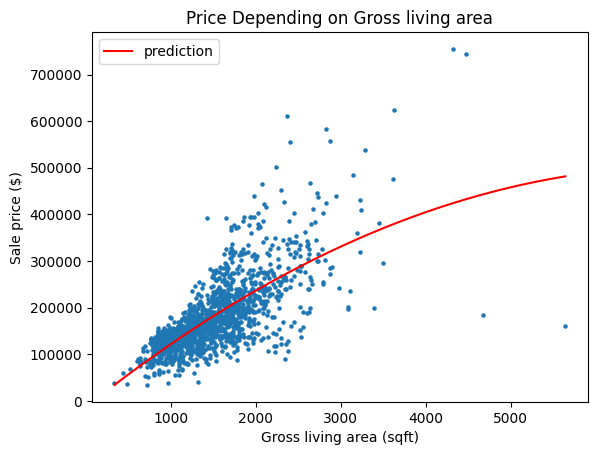

In [70]:
# 시각화
plt.scatter(X, Y, s = 5)
plt.plot(X_test, result, 'r', label = 'prediction')
plt.title('Price Depending on Gross living area')
plt.xlabel('Gross living area (sqft)')
plt.ylabel('Sale price ($)')
plt.legend()
plt.show()

In [64]:
# 성능 확인하기
train_r2 = lr.score(x_poly, Y)
print('train r2 score:', train_r2)

train r2 score: 0.508504842437747


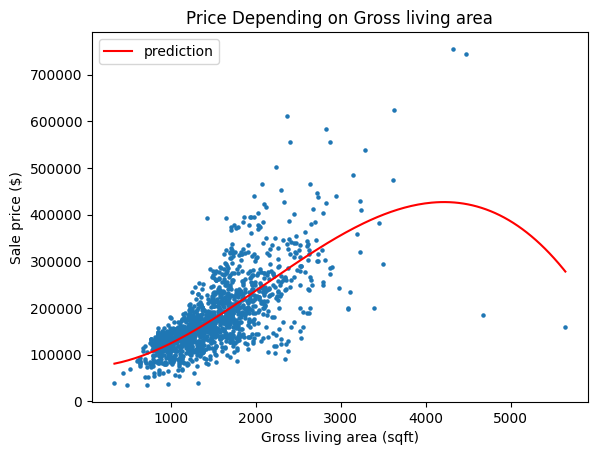

train r2 score: 0.508504842437747


In [72]:
# degree를 3으로 설정하고, 나머지는 동일하게 진행하자.
model = PolynomialFeatures(degree=3, include_bias=False)
x_poly = model.fit_transform(X)

lr = LinearRegression()
lr.fit(x_poly, Y)

lr = LinearRegression()
lr.fit(x_poly, Y)

# 에측값 생성
X_test = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
graph_ploy = model.transform(X_test)
result = lr.predict(graph_ploy)

plt.scatter(X, Y, s = 5)
plt.plot(X_test, result, 'r', label = 'prediction')
plt.title('Price Depending on Gross living area')
plt.xlabel('Gross living area (sqft)')
plt.ylabel('Sale price ($)')
plt.legend()
plt.show()

# 성능 확인
print('train r2 score:', train_r2)

각 회귀의 `R2` 값이 왜 이렇게 나왔는지 생각해보자.

In [74]:
# 회귀를 통해 얻은 모델을 사용하여, GrLivArea의 값이 1722 sqft인 주택의 가격을 예측하라.

# X_test 데이터에 대한 다항 특성 변환
X_test_poly = model.transform(X_test.reshape(-1,1))

# 모델을 사용하여 X_test_poly에 대한 예측값 생성
predictions = lr.predict(X_test_poly)

# 예측 결과 출력
print(f"Predictions for X_test: $ {predictions}")

Predictions for X_test: $ [ 80487.25496924  81498.67464563  82580.37827934  83731.29254674
  84950.3441242   86236.4596881   87588.56591483  89005.58948075
  90486.45706226  92030.09533571  93635.43097751  95301.39066401
  97026.9010716   98810.88887666 100652.28075557 102550.00338469
 104502.98344042 106510.14759913 108570.4225372  110682.734931
 112846.01145691 115059.17879131 117321.16361059 119630.8925911
 121987.29240925 124389.28974139 126835.81126392 129325.78365321
 131858.13358563 134431.78773756 137045.67278539 139698.71540549
 142389.84227424 145117.98006801 147882.05546318 150680.99513614
 153513.72576326 156379.17402092 159276.26658549 162203.93013336
 165161.09134089 168146.67688448 171159.6134405  174198.82768532
 177263.24629532 180351.79594688 183463.40331639 186596.99508021
 189751.49791473 192925.83849632 196118.94350136 199329.73960623
 202557.15348731 205800.11182097 209057.5412836  212328.36855156
 215611.52030125 218905.92320903 222210.50395128 225524.18920439
 2

# Q3. Polynomial Regression 2



#### 규제 적용하기
Q2에서는 규제가 없고, feature가 2개였다. 이번에는 규제를 적용하고, 사용하는 특성을 늘려 다중 회귀를 구현해보자.

In [75]:
#import required packages
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing_Prices_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
#집값을 측정하는데 영향을 미치는 변수들은 많지만, 여기서는 6개의 변수만 사용하도록 하자
linear_cols = ['OverallQual', 'TotalBsmtSF', 'FullBath', '2ndFlrSF', 'GrLivArea','TotRmsAbvGrd']
df = df[linear_cols + ['SalePrice']]
df.head()

,OverallQual,TotalBsmtSF,FullBath,2ndFlrSF,GrLivArea,TotRmsAbvGrd,SalePrice
0,7,856,2,854,1710,8,208500
1,6,1262,2,0,1262,6,181500
2,7,920,2,866,1786,6,223500
3,7,756,1,756,1717,7,140000
4,8,1145,2,1053,2198,9,250000


In [78]:
# 결측치 확인
print(df.isnull())

      OverallQual  TotalBsmtSF  FullBath  2ndFlrSF  GrLivArea  TotRmsAbvGrd  \
0           False        False     False     False      False         False   
1           False        False     False     False      False         False   
2           False        False     False     False      False         False   
3           False        False     False     False      False         False   
4           False        False     False     False      False         False   
...           ...          ...       ...       ...        ...           ...   
1455        False        False     False     False      False         False   
1456        False        False     False     False      False         False   
1457        False        False     False     False      False         False   
1458        False        False     False     False      False         False   
1459        False        False     False     False      False         False   

      SalePrice  
0         False  
1         False

In [79]:
# df의 마지막 열을 y(target)로 하고 나머지는 x(features)가 되도록 데이터를 분리해보자.
x = df[linear_cols]
y = df["SalePrice"]

In [80]:
# train, test로 분리해보자 (단, test_size는 0.2, random state는 156으로 되도록 설정)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156)


In [86]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 x_train과 x_test를 변환하자
# 단, degree는 3으로 설정하자
model = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train = model.fit_transform(X_train)
x_poly_test = model.fit_transform(X_test)

# from sklearn.linear_model import Ridge 릿지 규제를 사용해서 모델을 학습시켜보자
ridge = Ridge(alpha = 0) # alpha 의 값을 조정하며 성능을 확인해보자
ridge.fit(x_poly_train, y_train)

# 학습된 모델의 train, test score를 확인해보자
train_r3 = ridge.score(x_poly_train, y_train)
test_r3 = ridge.score(x_poly_test,y_test )
y_pred = ridge.predict(x_poly_test)

print(train_r3, test_r3)

0.8724928452231993 0.8435433100621553


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.35676e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


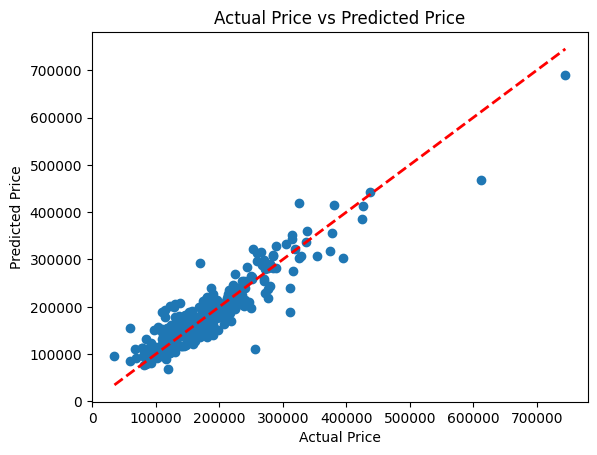

In [87]:
# 시각화
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

**모델의 정확도 구하기**  
**HINT** :Scikit-learn의 metrics에는 `accuracy_score()`이라는 function이 있습니다. 이 외에도 `mean_squared_error()`를 통해 MSE를 구할 수 있습니다. 이에 대해 찾아보시고 사용해보세요.

이때 pred에는 x_test에 대한 모델의 예측값이 들어가야함.

In [88]:
# 모델의 정확도를 찾아보자.
# HINT : from sklearn.metrics import accuracy_score를 찾아보시고 사용해보세요.
from sklearn.metrics import mean_squared_error

# y_test: 실제 타겟값, y_pred: 모델의 예측값
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))


Mean Squared Error: 1054098570.94


# Bonus

Prometheus 2022 basic study wk3 assignment Problem 2

  
Scikit-learn의 datasets 서브 패키지에는 선형 회귀/로지스틱 회귀용 가상 데이터를 생성할 수 있는 명령어인 `make_regression()`, `make_classification()`이 있습니다. 다음 명령어를 활용해 선형 회귀를 구현하세요.

*1*. `make_regression()`을 활용해 선형 회귀용 가상 데이터를 생성하세요.

- sample은 5000개, feature variable은 2개로 지정하세요.
- y절편을 10 증가시키고, 전체적인 데이터의 variance를 10으로 지정하세요.

In [97]:
from sklearn.datasets import make_regression
 #수정함 https://colab.research.google.com/github/datascienceschool/book/blob/master/ds/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.ipynb#scrollTo=p57C4AzncUuS 참고

bias = 10
x, y, c = make_regression(
    n_samples=5000, n_features=2, bias=bias, noise=10, coef=True, random_state=1
)
"""
coef=True로 설정하면 함수는 데이터 x, 대상 변수 y, 그리고 실제 계수 배열을 반환합니다. 따라서 반환값을 받을 때 3개의 변수를 사용해야 합니다
"""

In [94]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, s=5, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

InvalidIndexError: ignored

2. 위의 데이터를 가지고 선형회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test =

std_scale =
std_scale.

x_train_std =
x_test_std =

lr =
lr.